# TP3 : Loi hypergéométrique - Plan d'échantillonage

## 1. Convergence de la loi hypergéométrique

> On considère une variable $X_{N_1, N_2}^n$ de loi hypergéométrique $(min(N_1, N_2) \geq n)$. Simuler pour différentes valeurs de $n, N_1, N_2$ des $k$-échantillons de même loi que $X_{N_1, N_2}^n$. Comparer ces échantillons à ceux obtenus par les lois limites possibles (Binomiale et Poisson). On pourra comparer les deux lois empiriques.

In [1]:
import numpy as np

N1 = 1000 # Nombre de "bons" tirages possibles
N2 = 3000 # Nombre de "mauvaix" tirages possibles
N = N1 + N2 # Nombre total de tirages possibles
n = 1000 # Nombre de tirages effectués
k = 10000

X = np.random.hypergeometric(N1, N2, n, size=k)

### Comparaison avec une loi binomiale 

Si $N_1+N_2$ et $N_1$ sont suffisamment grand comparés à $n$ et que $p$ n'est pas trop proche de 0 ou de 1, alors la distribution hypergéométrique de paramètre $(N_1, N_2, n)$ peut s'approximer par une distribution binomiale de paramètre $(N_1+N_2, N_1)$. Intuitivement l'idée est qu'un nombre suffisant de choix possibles fait qu'un tirage sans remise (cas de la loi hypergéométrique) ressemble à un tirage avec remise (cas la loi binomiale).

In [2]:
p = N1 / N
Y = np.random.binomial(n, p, size=k)

### Comparaison avec une loi de Poisson

In [3]:
Z = np.random.poisson(p * n, size=k)

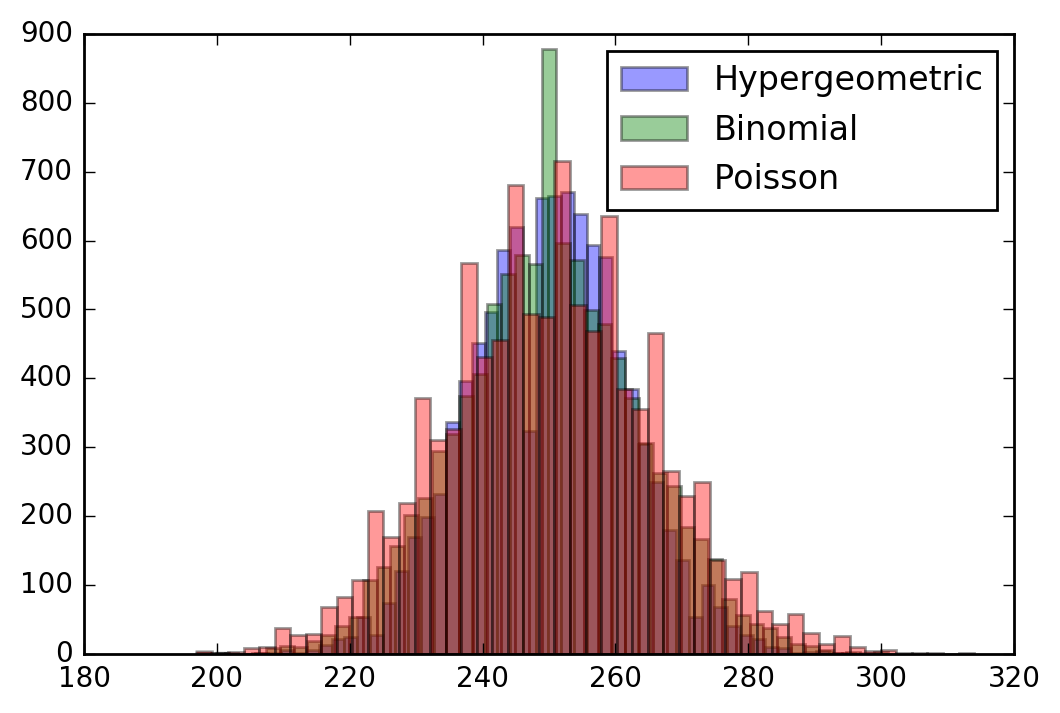

In [4]:
import matplotlib.pyplot as plt

plt.hist(X, bins=50, alpha=0.4, label='Hypergeometric')
plt.hist(Y, bins=50, alpha=0.4, label='Binomial')
plt.hist(Z, bins=50, alpha=0.4, label='Poisson')
plt.legend(loc='upper right')
plt.show()

## 2. Echantillonage

> On se place dans le cadre d'un plan d'échantillonage simple. Ecrire un programme qui calcule $n$ et $c$ lorsque l'on se donne ($p_1$, $1 - \alpha$) le rique fournisseur et ($p_2$, $\beta$) le risque client ($p_1 \leq p_2$). On se placera d'abord dans le cas hypergéométrique, puis on considèrera les approximations binomiales et de Poisson.

On cherche un couple $(n,c)$ tel que $\mathbb{P}_{NQA}(X^{(n)} > c) \leq \alpha$ et que $\mathbb{P}_{NQL}(X^{(n)} \leq c) \leq \beta$.

### Loi hypergéométrique

In [12]:
from scipy.stats import hypergeom


N = 1000

p1 = 0.05
p2 = 0.08

N1_provider = int(p1 * N)
N2_provider = N - N1_provider

N1_customer = int(p2 * N)
N2_customer = N - N1_customer

alpha = 0.1
beta = 0.2


for n in range(10, 300):
    found = False
    for c in range(1, n):
        provider_satisfied = 1 - hypergeom.cdf(c, N, N1_provider, n) <= alpha
        customer_satisfied = hypergeom.cdf(c, N, N1_customer, n) <= beta
        if provider_satisfied and customer_satisfied:
            found = True
            break
    if found:
        break

print('(n, c) = ({}, {})'.format(n, c))

(n, c) = (233, 15)


### Loi binomiale

In [13]:
from scipy.stats import binom


for n in range(10, 300):
    found = False
    for c in range(1, n):
        provider_satisfied = 1 - binom.cdf(c, N, N1_provider / N) <= alpha
        customer_satisfied = binom.cdf(c, N, N1_customer / N) <= beta
        if provider_satisfied and customer_satisfied:
            found = True
            break
    if found:
        break
    
print('(n, c) = ({}, {})'.format(n, c))

(n, c) = (60, 59)


### Loi de Poisson

In [15]:
from scipy.stats import poisson


for n in range(10, 300):
    found = False
    for c in range(1, n):
        provider_satisfied = 1 - poisson.cdf(c, n * N1_provider / N) <= alpha
        customer_satisfied = poisson.cdf(c, n * N1_customer / N) <= beta
        if provider_satisfied and customer_satisfied:
            found = True
            break
    if found:
        break
    
print('(n, c) = ({}, {})'.format(n, c))

(n, c) = (299, 298)
